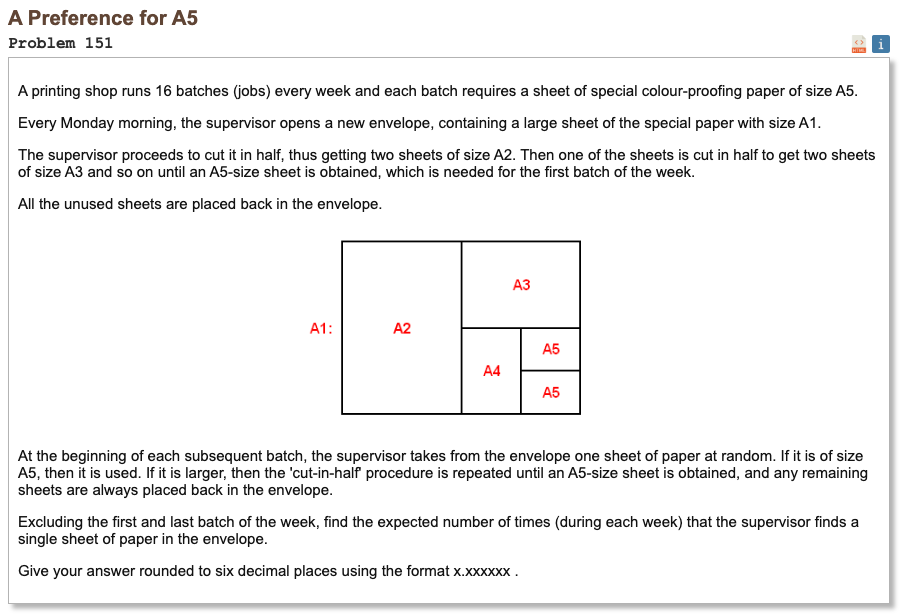

## Initial approach

* start with 1 sheet of each: a2, a3, a4, a5
* simulate every possible random draw recursively
* each time only one sheet exists (and not the final single a5), count +1
* for each state, average the expected values of next possible states
* store computed results manually in a dictionary to avoid recomputation
* recursion stops when envelope is empty
* final expected value = result from starting state (1,1,1,1)
* no external libraries, just dict for caching

In [1]:
def next_states(a2, a3, a4, a5):
    total = a2 + a3 + a4 + a5
    if total == 0:
        return []
    states = []
    for size, cnt in ((2, a2), (3, a3), (4, a4), (5, a5)):
        if cnt == 0:
            continue
        p = cnt / total
        if size == 5:
            states.append((p, (a2, a3, a4, a5 - 1)))
        elif size == 4:
            states.append((p, (a2, a3, a4 - 1, a5)))
        elif size == 3:
            states.append((p, (a2, a3 - 1, a4 + 1, a5)))
        else:
            states.append((p, (a2 - 1, a3 + 1, a4 + 1, a5)))
    return states

memo = {}

def expected_singletons(a2, a3, a4, a5):
    if (a2, a3, a4, a5) in memo:
        return memo[(a2, a3, a4, a5)]
    if a2 + a3 + a4 + a5 == 0:
        return 0.0
    single_now = (a2 + a3 + a4 + a5 == 1) and not (a5 == 1 and a2 + a3 + a4 == 0)
    val = 1.0 if single_now else 0.0
    s = 0.0
    for p, nxt in next_states(a2, a3, a4, a5):
        s += p * expected_singletons(*nxt)
    res = val + s
    memo[(a2, a3, a4, a5)] = res
    return res


In [2]:
%%time
result = round(expected_singletons(1, 1, 1, 1), 6)
print("Result:", f"{result:.6f}")

Result: 1.427904
CPU times: user 100 μs, sys: 3 μs, total: 103 μs
Wall time: 103 μs
